# Лабораторная работа 3.07
### Изучение свойств ферромагнетика
#### Отчет подготовил: Ярощук Владислав Викторович, M3208

In [2]:
import pandas as pd
import numpy as np
from math import sqrt
from math import pi
import matplotlib.pyplot as plt
from numpy import polyfit, polyval

In [3]:
# Constants
N1 = 1665
N2 = 970
L = 78 * 20**-2 # м
R1 = 68 # Ом
R2 = 470 * 10**3 # Ом
C1 = 0.47 * 10**-6 # Ф
S = 0.64 * (10**-2)**2 # м^2
u0 = 4*pi*10**-7 # Гн/м
Spg = 7.8 # единиц площади

freq = 30 # Гц
Vpp0 = 20 # В

alpha = N1 / (L * R1)
betta = R2 * C1 / (N2 * S)

In [4]:
def xi(Kx, Ky):
    return Kx*Ky*N1*R2*C1*freq/(N2*R1)

In [5]:
# Таблица 1, пересечение с осями координат
df1 = pd.DataFrame({'Kx':[100 * 10**-3],
                    'Ky':[50 * 10**-3],
                    'Xc':[1.1], 
                    'Yr':[1.5]})

# Вычисление коэрцитивной силы (А/м) и остаточной индукции (Тл)
df1['Hc'] = df1['Kx'] * df1['Xc'] * alpha
df1['Br'] = df1['Ky'] * df1['Yr'] * betta

# Таблица 1
df1

,Kx,Ky,Xc,Yr,Hc,Br
0,0.1,0.05,1.1,1.5,13.812217,0.266873


In [6]:
# Таблица 2, вершина петли гистерезиса, состояние насыщения
df2 = pd.DataFrame({'Kx':[100 * 10**-3],
                    'Ky':[50 * 10**-3],
                    'Xm':[3.4],
                    'Ym':[2.6]})

df2['Hm'] = df2['Kx'] * df2['Xm'] * alpha
df2['Bm'] = df2['Ky'] * df2['Ym'] * betta

# Вычисление значения магнитной проницаемости, соответствующее состоянию насыщения  Гн/м
df2['um'] = df2['Bm'] / df2['Hm']
# Вычисление значения относительной магнитной проницаемости, соответствующее состоянию насыщения
df2['um/u0'] = df2['Bm'] / (df2['Hm'] * u0)

df2

,Kx,Ky,Xm,Ym,Hm,Bm,um,um/u0
0,0.1,0.05,3.4,2.6,42.692308,0.462581,0.010835,8622.394021


In [7]:
# Расчет средней мощности, расходуемой на перемагничивание образца
print('P :', xi(100 * 10**-3, 50 * 10**-3) * Spg)

P : 0.006524018268647665


In [8]:
# Изменяем амплитудное напряжение, записываем измерения
df3 = pd.DataFrame({'U': list(range(20,0,-1)),
                    'X':[3.4, 3.2, 3, 2.8, 2.6, 2.4, 2.2, 2, 3.8, 
                         3.5, 3.2, 3, 2.8, 2.6, 2.4, 2.2, 2, 1.8, 
                         3.4, 2.4],
                    'Kx':[100 * 10**-3, 100 * 10**-3, 100 * 10**-3, 
                          100 * 10**-3, 100  * 10**-3, 100 * 10**-3, 
                          100 * 10**-3, 100 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          20 * 10**-3, 20 * 10**-3],
                    'Y':[2.8, 2.7, 2.6, 2.5, 2.4, 2.2, 2, 1.9, 1.8,
                         4, 3.8, 3.6, 3.1, 2.8, 2.6, 2.2, 1.8, 3,
                         4, 3],
                    'Ky':[50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3, 
                          50 * 10**-3, 50 * 10**-3, 50 * 10**-3,
                          20 * 10**-3, 20 * 10**-3, 20 * 10**-3,
                          20 * 10**-3, 20 * 10**-3, 20 * 10**-3,
                          20 * 10**-3, 20 * 10**-3, 10 * 10**-3,
                          5 * 10**-3, 5 * 10**-3]})
# Вычисляем требуемые значения
df3['H'] = df3['Kx'] * df3['X'] * alpha
df3['B'] = df3['Ky'] * df3['Y'] * betta
df3['u'] = df3['B'] / df3['H']
df3['u/u0'] = df3['B'] / (df3['H'] * u0)

df3


,U,X,Kx,Y,Ky,H,B,u,u/u0
0,20,3.4,0.10,2.8,0.050,42.692308,0.498164,0.011669,9285.655099
1,19,3.2,0.10,2.7,0.050,40.180995,0.480372,0.011955,9513.651095
2,18,3.0,0.10,2.6,0.050,37.669683,0.462581,0.012280,9772.046557
3,17,2.8,0.10,2.5,0.050,35.158371,0.444789,0.012651,10067.355656
4,16,2.6,0.10,2.4,0.050,32.647059,0.426997,0.013079,10408.096925
5,15,2.4,0.10,2.2,0.050,30.135747,0.391414,0.012988,10335.818474
6,14,2.2,0.10,2.0,0.050,27.624434,0.355831,0.012881,10250.398486
7,13,2.0,0.10,1.9,0.050,25.113122,0.338040,0.013461,10711.666418
8,12,3.8,0.05,1.8,0.050,23.857466,0.320248,0.013423,10681.994212
9,11,3.5,0.05,4.0,0.020,21.973982,0.284665,0.012955,10308.972192


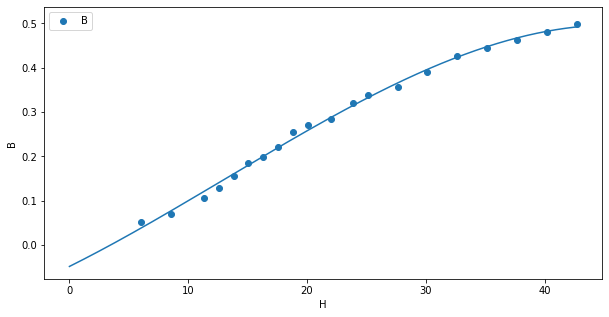

In [9]:
# Строим кривую начального намагничивания
fig, ax = plt.subplots(figsize=(10, 5))

x = np.linspace(0, max(df3['H']), 10000)

bk3, bk2, bk1, bk = polyfit(np.array(df3['H']), np.array(df3['B']), 3)
ax.scatter(df3['H'], df3['B'], label='B')
ax.plot(x, polyval([bk3, bk2, bk1, bk], x))
ax.set_xlabel('H')
ax.set_ylabel('B')
ax.legend()

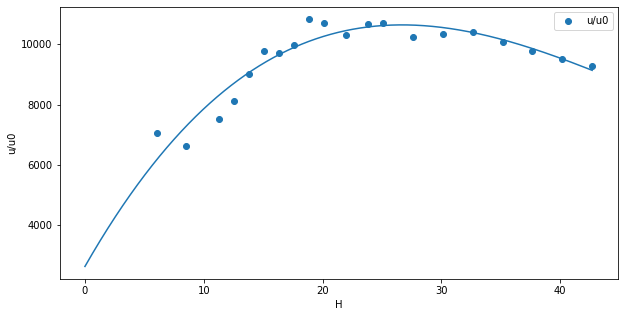

In [10]:
# Строим график зависимости относительной магнитной проницаемости от напряженности магнитного поля
fig, ax = plt.subplots(figsize=(10, 5))

x = np.linspace(0, max(df3['H']), 10000)

k3, k2, k1, k = polyfit(np.array(df3['H']), np.array(df3['u/u0']), 3)
ax.scatter(df3['H'], df3['u/u0'], label='u/u0')
ax.plot(x, polyval([k3, k2, k1, k], x))
ax.set_xlabel('H')
ax.set_ylabel('u/u0')
ax.legend()


In [11]:
# Из графика находим напряженность, при которой наблюдается максимум магнитной проницаемости
maxUH = x[np.argmax(polyval([k3, k2, k1, k], x))]

# Выводим соответствующие значения магнитной проницаемости (относительной и абсолютной)
print("u/u0 max: ", polyval([bk3, bk2, bk1, bk], maxUH) / (u0 * maxUH))
print("u max: ", polyval([bk3, bk2, bk1, bk], maxUH) / (maxUH))

# И параметры, при которых максимум наблюдается
print("B, if u=umax: ", polyval([bk3, bk2, bk1, bk], maxUH))
print("H, if u=umax: ", maxUH)

u/u0 max:  10545.869741931323
u max:  0.013252330762786533
B, if u=umax:  0.35369981134258915
H, if u=umax:  26.68963050151169


In [12]:
# Вывод:
print('''Получены требуемые в лабораторной работе значения, приведены в пунктах выше.
    Изучены свойства ферромагнетика, экспериментально вычислены параметры образца путем анализа петли гистерезиса.
    Для усреднения результатов были применены методы апроксимации дискретных значний полиномом 3-го порядка.
    Установлено, что остаточная магнитная индукция пропорциональна намагниченности. Магнитная проницаемость
    не имеет прямой зависимости от намагниченности: возрастает до некоторого максимума, после убывает.            
    ''')

Получены требуемые в лабораторной работе значения, приведены в пунктах выше.
    Изучены свойства ферромагнетика, экспериментально вычислены параметры образца путем анализа петли гистерезиса.
    Для усреднения результатов были применены методы апроксимации дискретных значний полиномом 3-го порядка.
    Установлено, что остаточная магнитная индукция пропорциональна намагниченности. Магнитная проницаемость
    не имеет прямой зависимости от намагниченности: возрастает до некоторого максимума, после убывает.            
    


In [13]:
# Модель петли гистерезиса
Hc = df1['Hc'][0]
Br = df1['Br'][0]
Bs = df2['Bm'][0]

# Функция, задающая верхную полупетлю
def FuncUp(H):
    return (Bs * (H + Hc) / (abs (H + Hc) + Hc * (Bs / Br - 1)) + u0 * H)

# Функция, задающая нижнюю полупетлю
def FuncDown(H):
    return ((Bs * (H - Hc) / (abs (H - Hc) + Hc * (Bs / Br - 1)) + u0 * H))

# Функция, задающая начальную часть петли
def FuncAvg(H):
    return (FuncUp(H)+FuncDown(H)) / 2

Text(0, 0.5, 'B')

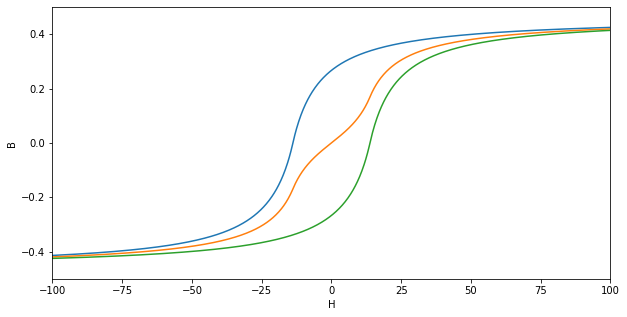

In [14]:
# Построение графиков
x = np.linspace(-100, 100, 1000)

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlim(-100, 100)
ax.set_ylim(-0.5, 0.5)
ax.plot(x, FuncUp(x))
ax.plot(x, FuncAvg(x))
ax.plot(x, FuncDown(x))

ax.set_xlabel('H')
ax.set_ylabel('B')